<a href="https://colab.research.google.com/github/labgeothermal/S3-Zahra/blob/main/iris_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
X = df.iloc[:,0:4].values
X = StandardScaler().fit_transform(X)
Y = df.iloc[:,4].values

In [38]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(X)
PC_components = np.arange(pca.n_components_) + 1

In [39]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [40]:
cum_explained_variance = np.cumsum(explained_variance)
cum_explained_variance

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

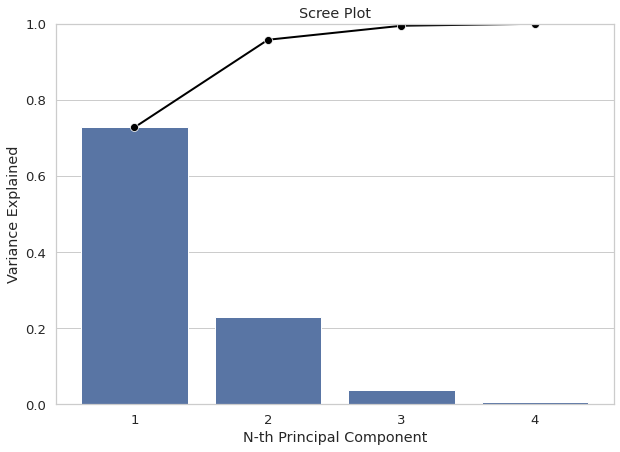

In [41]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

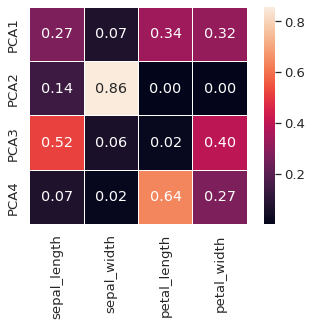

In [42]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "vertical"})